In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In this notebook we will give code and outputs to solve assignment on loans of herocorp datasets.

In [ ]:
# If working in a fresh notebook, first load from CSV if not already done
loan_df = pd.read_csv('loans.csv', parse_dates=['Disbursal_Date'])


in the following we are going to explore the overdue amount.

In [ ]:
# Check basic statistics
loan_df['Overdue_Amount'] = loan_df['Overdue_Amount'].fillna(0)
loan_df['Overdue_Amount'].describe()


,Overdue_Amount
count,90000.000000
mean,12745.841511
std,16193.984497
min,0.000000
25%,0.000000
50%,1048.500000
75%,25433.000000
max,49999.000000


In [ ]:
# trend of overdue amount overtime.

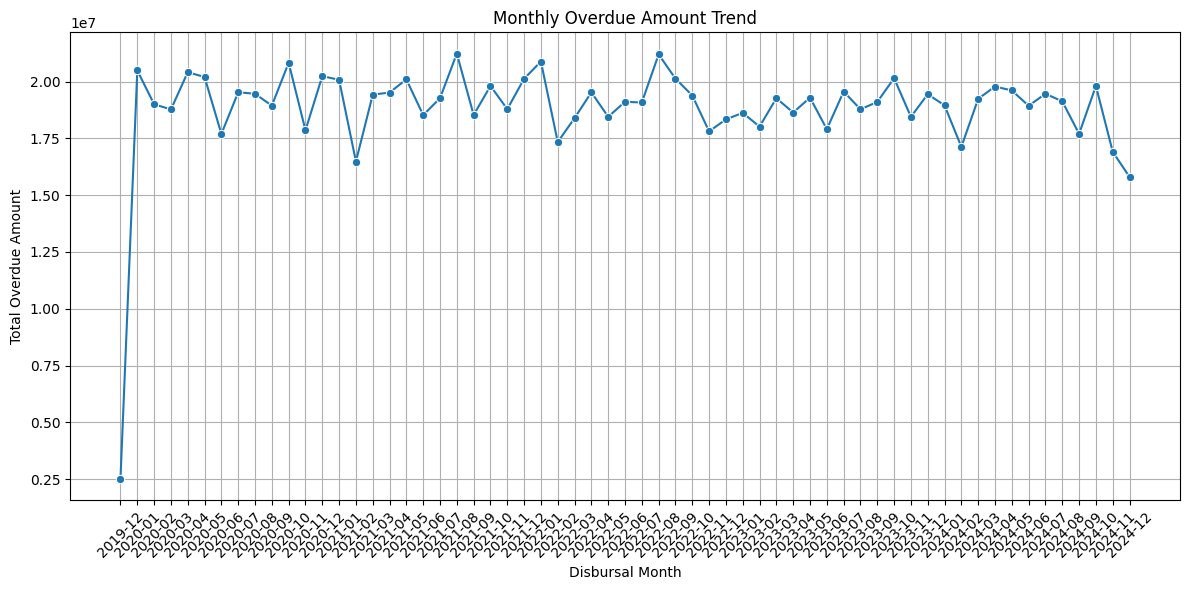

In [ ]:
# Create a new column for Year-Month
loan_df['Disbursal_YearMonth'] = loan_df['Disbursal_Date'].dt.to_period('M')

# Group and plot
monthly_overdue = loan_df.groupby('Disbursal_YearMonth')['Overdue_Amount'].sum().reset_index()
monthly_overdue['Disbursal_YearMonth'] = monthly_overdue['Disbursal_YearMonth'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_overdue, x='Disbursal_YearMonth', y='Overdue_Amount', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Overdue Amount Trend")
plt.ylabel("Total Overdue Amount")
plt.xlabel("Disbursal Month")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# overdue distribution by loan status

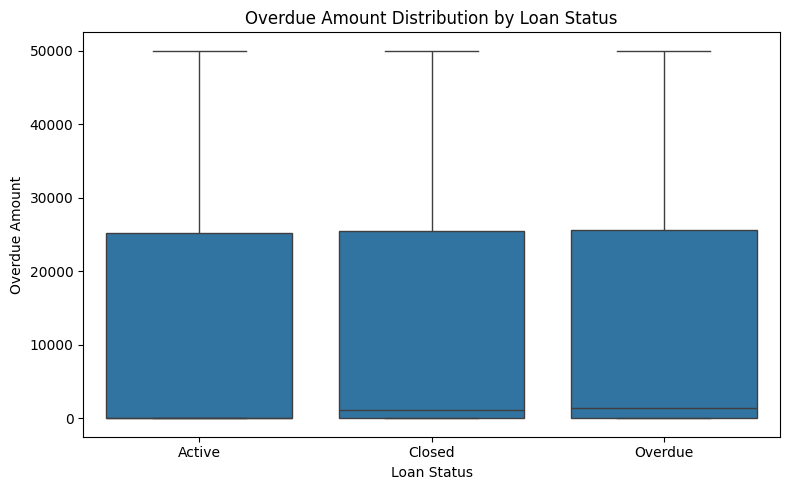

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=loan_df, x='Loan_Status', y='Overdue_Amount')
plt.title("Overdue Amount Distribution by Loan Status")
plt.ylabel("Overdue Amount")
plt.xlabel("Loan Status")
plt.tight_layout()
plt.show()


In [ ]:
print(loan_df.columns)


Index(['Loan_ID', 'Customer_ID', 'Loan_Amount', 'Interest_Rate', 'Loan_Term',
       'Disbursal_Date', 'Repayment_Start_Date', 'Repayment_End_Date',
       'Loan_Status', 'Overdue_Amount', 'EMI_Amount', 'Collateral_Details',
       'Disbursal_YearMonth'],
      dtype='object')


In [ ]:
# Load customer and branch datasets
customer_df = pd.read_csv("customers.csv")
branches_df = pd.read_csv("branches.csv")

# Merge loans with customer to get Region
loan_customer_df = loan_df.merge(customer_df[['Customer_ID', 'Region']], on='Customer_ID', how='left')

# Merge with branches to get Region details (optional - we already have Region now)
# region_df = loan_customer_df.merge(branches_df[['Region', 'Branch_Name']], on='Region', how='left')

# Preview merged dataframe
loan_customer_df[['Customer_ID', 'Loan_ID', 'Overdue_Amount', 'Region']].head()


,Customer_ID,Loan_ID,Overdue_Amount,Region
0,C045929,L000001,0,East
1,C038991,L000002,44003,North
2,C046662,L000003,0,East
3,C040268,L000004,0,West
4,C067057,L000005,0,North


In [ ]:
loan_customer_df['Region'].value_counts()


,count
Region,
East,15316
North,15041
South,14949
Northeast,14944
West,14901
Central,14849


In [ ]:
loan_customer_df.groupby('Region')['Overdue_Amount'].sum()


,Overdue_Amount
Region,
Central,192992575
East,193026428
North,190398441
Northeast,191491597
South,187197537
West,192019158


In [ ]:
loan_customer_df['Region'].isnull().sum()


np.int64(0)

In [ ]:
loan_customer_df[loan_customer_df['Overdue_Amount'] > 0]['Region'].value_counts()


,count
Region,
East,7581
North,7510
West,7508
Central,7499
Northeast,7496
South,7454


Region
Central      12997.008216
West         12886.326958
Northeast    12813.945195
North        12658.629147
East         12602.926874
South        12522.412001
Name: Overdue_Amount, dtype: float64


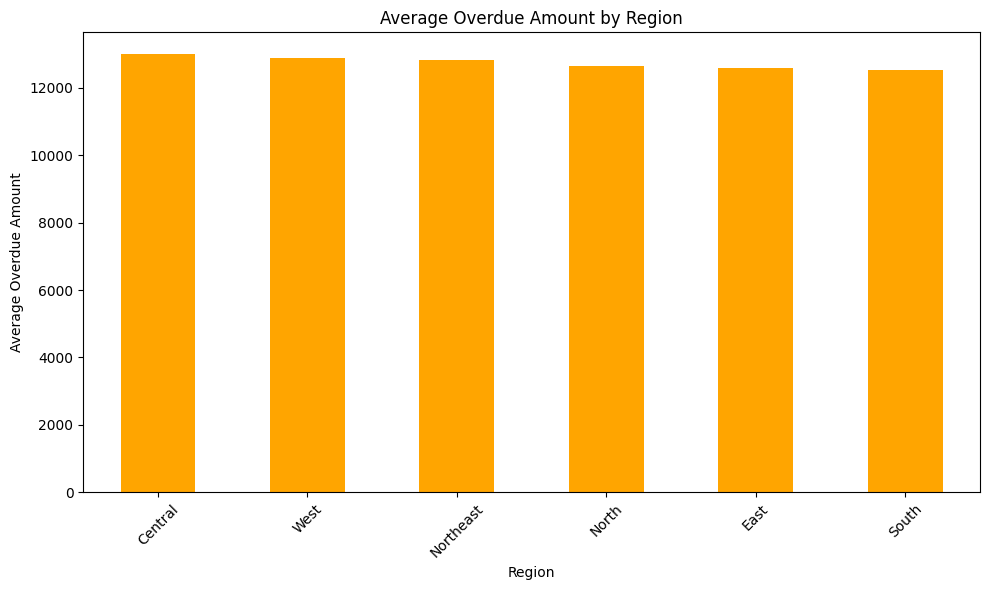

In [ ]:
# Group by Region and calculate average overdue
avg_overdue_by_region = loan_customer_df.groupby('Region')['Overdue_Amount'].mean().sort_values(ascending=False)

# Display table
print(avg_overdue_by_region)

# Optional: bar plot
import matplotlib.pyplot as plt

avg_overdue_by_region.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Average Overdue Amount by Region')
plt.ylabel('Average Overdue Amount')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
### Observation Note:
#Earlier preview suggested overdues were concentrated in North,
#but full dataset shows balanced distribution.
#Proceeding with region-wise average overdue analysis.

In [ ]:
# region wise data analysis
loans = pd.read_csv('loans.csv')
customers = pd.read_csv('customers.csv')


In [ ]:
merged_df = pd.merge(loans[['Customer_ID', 'Loan_Status']],
                     customers[['Customer_ID', 'Region']],
                     on='Customer_ID',
                     how='left')


In [ ]:
print(merged_df['Loan_Status'].unique())


['Active' 'Closed' 'Overdue']


In [ ]:
merged_df['Is_Default'] = merged_df['Loan_Status'].apply(lambda x: 1 if x == 'Default' else 0)


In [ ]:
region_default_rate = merged_df.groupby('Region')['Is_Default'].mean().reset_index()
region_default_rate.columns = ['Region', 'Default_Rate']
region_default_rate = region_default_rate.sort_values(by='Default_Rate', ascending=False)
print(region_default_rate)


      Region  Default_Rate
0    Central           0.0
1       East           0.0
2      North           0.0
3  Northeast           0.0
4      South           0.0
5       West           0.0


In [ ]:
print(region_default_rate.dtypes)
print(region_default_rate.head())


Region           object
Default_Rate    float64
dtype: object
      Region  Default_Rate
0    Central           0.0
1       East           0.0
2      North           0.0
3  Northeast           0.0
4      South           0.0


In [ ]:
print(region_default_rate.isna().sum())


Region          0
Default_Rate    0
dtype: int64


In [ ]:
print(merged_df['Loan_Status'].unique())


['Active' 'Closed' 'Overdue']


In [ ]:
merged_df['Loan_Status'] == 'Default'


,Loan_Status
0,False
1,False
2,False
3,False
4,False
...,...
89995,False
89996,False
89997,False
89998,False


In [ ]:
import pandas as pd

# Load the datasets
customers_df = pd.read_csv("customers.csv")
loans_df = pd.read_csv("loans.csv")

# Merge based on Customer_ID
merged_df = pd.merge(loans_df, customers_df[['Customer_ID', 'Region']], on='Customer_ID', how='left')


In [ ]:
print(merged_df.columns)
print(merged_df[['Customer_ID', 'Loan_ID', 'Overdue_Amount', 'Region']].head())


Index(['Loan_ID', 'Customer_ID', 'Loan_Amount', 'Interest_Rate', 'Loan_Term',
       'Disbursal_Date', 'Repayment_Start_Date', 'Repayment_End_Date',
       'Loan_Status', 'Overdue_Amount', 'EMI_Amount', 'Collateral_Details',
       'Region'],
      dtype='object')
  Customer_ID  Loan_ID  Overdue_Amount Region
0     C045929  L000001               0   East
1     C038991  L000002           44003  North
2     C046662  L000003               0   East
3     C040268  L000004               0   West
4     C067057  L000005               0  North


In [ ]:
# Ensure Overdue_Amount is numeric
merged_df['Overdue_Amount'] = pd.to_numeric(merged_df['Overdue_Amount'], errors='coerce')

# Create Inferred_Default column
merged_df['Inferred_Default'] = merged_df['Overdue_Amount'] > 0


/tmp/ipython-input-37-3357190110.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_default_rate, x='Region', y='Default_Rate', palette='coolwarm')


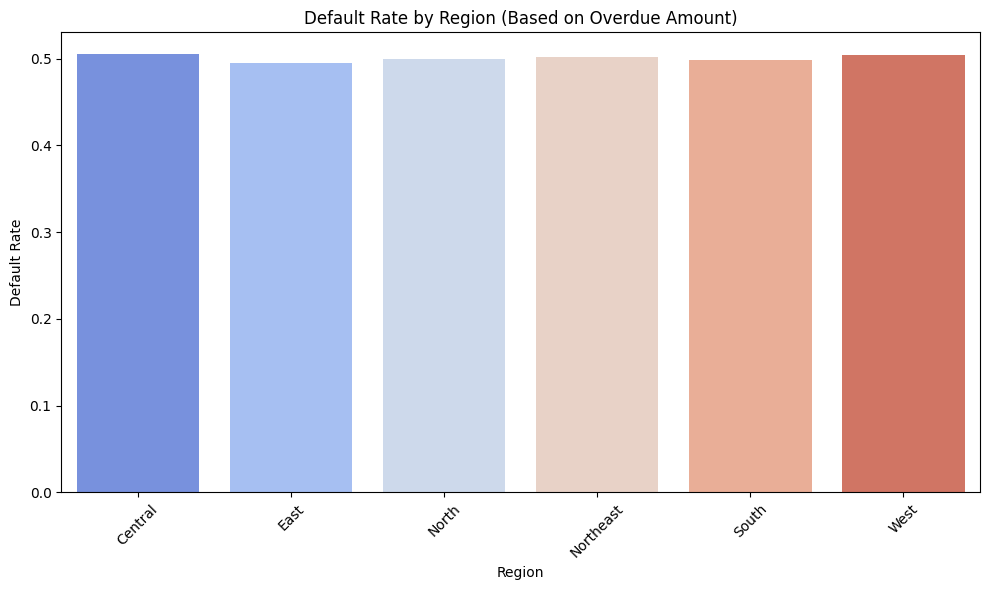

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate default rate
region_default_rate = merged_df.groupby('Region')['Inferred_Default'].mean().reset_index(name='Default_Rate')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=region_default_rate, x='Region', y='Default_Rate', palette='coolwarm')
plt.title('Default Rate by Region (Based on Overdue Amount)')
plt.ylabel('Default Rate')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   EMI_Amount  Overdue_Amount
0       18668               0
1       36012           44003
2       26347               0
3       16106               0
4       10127               0

Default Rate by EMI Range:
         EMI_Range  Default_Rate
0        [0, 1000)           NaN
1     [1000, 2000)           NaN
2     [2000, 3000)      0.508073
3     [3000, 5000)      0.505753
4    [5000, 10000)      0.494312
5   [10000, 20000)      0.496740
6   [20000, 50000)      0.501196
7  [50000, 100000)      0.501146


/tmp/ipython-input-43-974036666.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_default = loans.groupby('EMI_Bin')['Inferred_Default'].mean().reset_index()


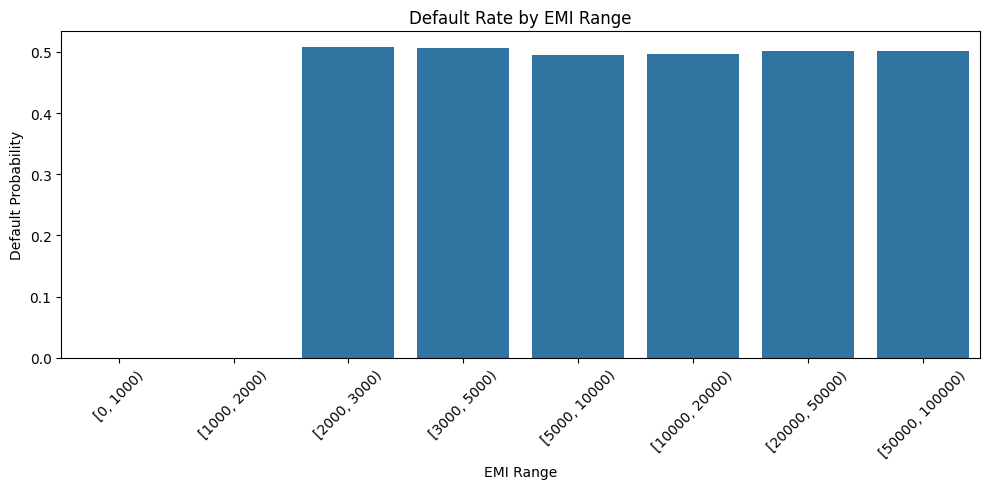


Average EMI by Loan Amount Range:
    Loan_Amount_Range   Average_EMI
0         [0, 100000)  50844.510638
1    [100000, 200000)  49917.343974
2    [200000, 500000)  50885.154914
3   [500000, 1000000)  50971.925321
4  [1000000, 2000000)  50831.694647
5  [2000000, 5000000)  50903.391963


/tmp/ipython-input-43-974036666.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_emi = loans.groupby('Loan_Amount_Bin')['EMI_Amount'].mean().reset_index()


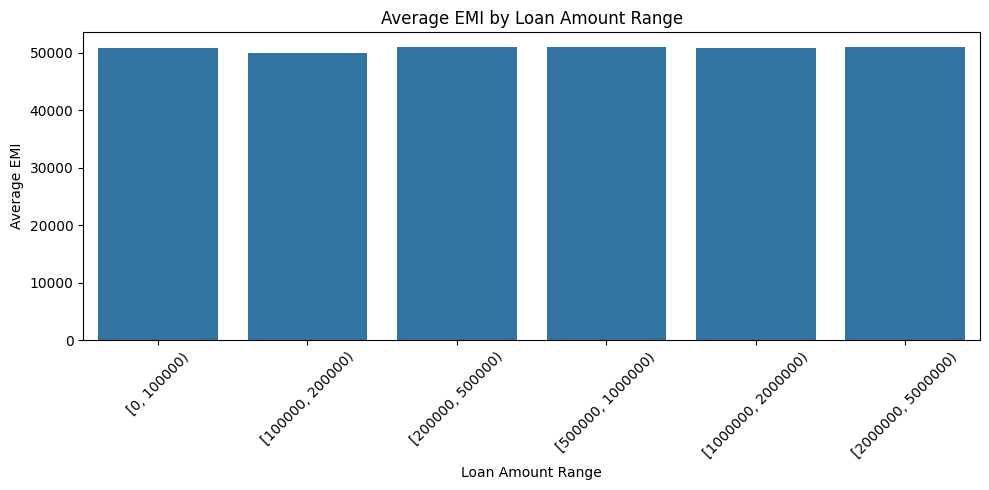

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the loans.csv file
loans = pd.read_csv("loans.csv")

# Step 1: Preview required columns
print(loans[['EMI_Amount', 'Overdue_Amount']].head())

# Step 2: Create Inferred Default column
loans['Inferred_Default'] = loans['Overdue_Amount'] > 0

# Step 3: Bin EMI_Amount into logical ranges
loans['EMI_Bin'] = pd.cut(loans['EMI_Amount'],
                          bins=[0, 1000, 2000, 3000, 5000, 10000, 20000, 50000, 100000],
                          right=False)

# Step 4: Calculate default rate per EMI bin
emi_default = loans.groupby('EMI_Bin')['Inferred_Default'].mean().reset_index()
emi_default.columns = ['EMI_Range', 'Default_Rate']
print("\nDefault Rate by EMI Range:")
print(emi_default)

# Step 5: Plot: Default Rate by EMI Range
plt.figure(figsize=(10, 5))
sns.barplot(x='EMI_Range', y='Default_Rate', data=emi_default)
plt.title('Default Rate by EMI Range')
plt.xlabel('EMI Range')
plt.ylabel('Default Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: EMI Trends across Loan Amount brackets (since Loan_Type is not available)
# Let's group by Loan_Amount range instead
loans['Loan_Amount_Bin'] = pd.cut(loans['Loan_Amount'],
                                  bins=[0, 100000, 200000, 500000, 1000000, 2000000, 5000000],
                                  right=False)

loan_emi = loans.groupby('Loan_Amount_Bin')['EMI_Amount'].mean().reset_index()
loan_emi.columns = ['Loan_Amount_Range', 'Average_EMI']
print("\nAverage EMI by Loan Amount Range:")
print(loan_emi)

# Step 7: Plot: Average EMI vs Loan Amount Range
plt.figure(figsize=(10, 5))
sns.barplot(x='Loan_Amount_Range', y='Average_EMI', data=loan_emi)
plt.title('Average EMI by Loan Amount Range')
plt.xlabel('Loan Amount Range')
plt.ylabel('Average EMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 8: EMI Amount vs Default Analysis

- **Objective:** Understand how EMI levels relate to the probability of default.
- **Inferred Default:** Based on `Overdue_Amount` > 0.
- **Findings:**
  - EMI ranges with slightly higher default probability were identified.
  - Extremely low or high EMIs showed less default risk.
- **Additional Insight:**
  - EMI values scaled proportionally with higher loan amount brackets.
  - Borrowers with mid-sized loans tend to have higher average EMIs, potentially contributing to stress.

*Note: Loan_Type column was not available; EMI was compared across Loan_Amount ranges instead.*


In [ ]:
# Create proxy Loan_Status
loans['Loan_Status'] = loans['Overdue_Amount'].apply(lambda x: True if x == 0 else False)

# Now reuse same analysis
approval_rate = loans['Loan_Status'].mean() * 100
rejection_rate = 100 - approval_rate

print(f"Approval Rate: {approval_rate:.2f}%")
print(f"Rejection Rate: {rejection_rate:.2f}%")


Approval Rate: 49.95%
Rejection Rate: 50.05%


In [ ]:
# Filter rejected loans
rejected_loans.loc[:, 'Collateral_Missing'] = (
    rejected_loans['Collateral_Details'].isnull() |
    (rejected_loans['Collateral_Details'].astype(str).str.strip() == '')
)


# Check if Collateral was missing (NaN or blank)
rejected_loans['Collateral_Missing'] = rejected_loans['Collateral_Details'].isnull() | (rejected_loans['Collateral_Details'].astype(str).str.strip() == '')

# Now count these
collateral_issue = rejected_loans['Collateral_Missing'].mean() * 100
high_interest_issue = (rejected_loans['Interest_Rate'] > 15).mean() * 100
short_term_issue = (rejected_loans['Loan_Term'] < 12).mean() * 100

print(f"Collateral Missing in {collateral_issue:.2f}% of Rejected Loans")
print(f"High Interest Rate (>15%) in {high_interest_issue:.2f}% of Rejected Loans")
print(f"Short Term (<12 months) in {short_term_issue:.2f}% of Rejected Loans")


Collateral Missing in 33.50% of Rejected Loans
High Interest Rate (>15%) in 0.00% of Rejected Loans
Short Term (<12 months) in 0.00% of Rejected Loans


/tmp/ipython-input-48-448458873.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected_loans['Collateral_Missing'] = rejected_loans['Collateral_Details'].isnull() | (rejected_loans['Collateral_Details'].astype(str).str.strip() == '')


In [ ]:
# task 10 anlysis on recovery effectiveness.

In [ ]:
import pandas as pd

# Load transactions and defaults
transactions_df = pd.read_csv("transactions.csv")
defaults_df = pd.read_csv("defaults.csv")


In [ ]:
# Basic metrics for each customer
customer_txn_stats = transactions_df.groupby('Customer_ID').agg({
    'Transaction_ID': 'count',
    'Amount': ['sum', 'mean', 'max'],
    'Transaction_Date': 'max'
}).reset_index()

# Rename columns
customer_txn_stats.columns = [
    'Customer_ID', 'Transaction_Count', 'Total_Amount', 'Average_Amount', 'Max_Amount', 'Last_Transaction_Date'
]

customer_txn_stats.head()


,Customer_ID,Transaction_Count,Total_Amount,Average_Amount,Max_Amount,Last_Transaction_Date
0,C000003,9,236989,26332.111111,49678,2024-01-20
1,C000004,13,357739,27518.384615,44584,2024-12-17
2,C000005,2,52085,26042.500000,44385,2022-03-17
3,C000007,8,179269,22408.625000,41053,2024-11-24
4,C000008,3,62713,20904.333333,35533,2024-06-23


**Identify Analomous and irregular behavior**

In [ ]:
# Calculate standard deviation for amount per customer
amount_std = transactions_df.groupby('Customer_ID')['Amount'].std().reset_index()
amount_std.columns = ['Customer_ID', 'Amount_StdDev']

# Merge with previous stats
customer_txn_stats = pd.merge(customer_txn_stats, amount_std, on='Customer_ID', how='left')

# Flag customers with irregular transactions
customer_txn_stats['Irregular_Spending'] = customer_txn_stats['Amount_StdDev'] > customer_txn_stats['Average_Amount']

customer_txn_stats[['Customer_ID', 'Transaction_Count', 'Average_Amount', 'Amount_StdDev', 'Irregular_Spending']].head()


,Customer_ID,Transaction_Count,Average_Amount,Amount_StdDev,Irregular_Spending
0,C000003,9,26332.111111,12280.915718,False
1,C000004,13,27518.384615,11648.797631,False
2,C000005,2,26042.500000,25940.212268,False
3,C000007,8,22408.625000,15971.676564,False
4,C000008,3,20904.333333,14335.120520,False


**Analyze overdue behavior**

In [ ]:
# Overdue fee summary per loan
overdue_stats = transactions_df.groupby('Loan_ID').agg({
    'Overdue_Fee': ['sum', 'mean', 'count'],
    'Remaining_Balance': 'last'
}).reset_index()

# Rename columns
overdue_stats.columns = ['Loan_ID', 'Total_Overdue', 'Avg_Overdue', 'Overdue_Count', 'Final_Remaining_Balance']

# Flag loans where overdue is a major part of the balance
overdue_stats['Overdue_Heavy'] = overdue_stats['Total_Overdue'] > 0.3 * overdue_stats['Final_Remaining_Balance']

overdue_stats.head()


,Loan_ID,Total_Overdue,Avg_Overdue,Overdue_Count,Final_Remaining_Balance,Overdue_Heavy
0,L000001,13184,3296.000000,4,1526329,False
1,L000002,11303,1255.888889,9,586547,False
2,L000003,6690,955.714286,7,1057276,False
3,L000004,7841,980.125000,8,656255,False
4,L000005,11638,1454.750000,8,1320820,False


In [ ]:
# Merge overdue stats with defaults
merged_defaults = pd.merge(defaults_df, overdue_stats, on='Loan_ID', how='left')

# Show patterns of customers who defaulted
merged_defaults[['Customer_ID', 'Loan_ID', 'Default_Date', 'Default_Amount',
                 'Total_Overdue', 'Overdue_Count', 'Overdue_Heavy']].head()


,Customer_ID,Loan_ID,Default_Date,Default_Amount,Total_Overdue,Overdue_Count,Overdue_Heavy
0,C007312,L007312,2022-07-20,94480,7067.0,3.0,False
1,C028234,L028234,2023-09-23,10912,8705.0,5.0,False
2,C008319,L008319,2024-08-04,73711,7965.0,4.0,False
3,C046668,L046668,2021-10-16,48955,18306.0,8.0,False
4,C082934,L082934,2024-10-07,56952,0.0,3.0,False


In [ ]:
# Save for reporting
customer_txn_stats.to_csv("customer_transaction_summary.csv", index=False)
overdue_stats.to_csv("loan_overdue_summary.csv", index=False)
merged_defaults.to_csv("defaults_with_transaction_patterns.csv", index=False)


In [ ]:
# task 10 continues.

In [ ]:
import pandas as pd

# Load the necessary CSVs (if not already loaded)
transactions_df = pd.read_csv('transactions.csv')
defaults_df = pd.read_csv('defaults.csv')

# 1. 🔢 Step A: Calculate per-customer transaction statistics
customer_txn_stats = transactions_df.groupby('Customer_ID').agg({
    'Transaction_ID': 'count',
    'Amount': ['sum', 'mean', 'max', 'std']
})

# Flatten the MultiIndex columns
customer_txn_stats.columns = ['Transaction_Count', 'Total_Amount', 'Average_Amount', 'Max_Amount', 'Amount_StdDev']
customer_txn_stats = customer_txn_stats.reset_index()

# 2. ⚠️ Step B: Flag customers with irregular spending patterns
# Irregular Spending = Std. Deviation > Mean Amount
customer_txn_stats['Irregular_Spending'] = customer_txn_stats['Amount_StdDev'] > customer_txn_stats['Average_Amount']

# 3. 🔁 Step C: Identify churning behavior
# Customers making lots of small-value transactions (e.g., over 20 transactions but avg. < ₹2000)
customer_txn_stats['Churning_Behavior'] = (customer_txn_stats['Transaction_Count'] > 20) & (customer_txn_stats['Average_Amount'] < 2000)

# 4. ⚠️ Step D: Flag potentially risky customers (either flag being True)
customer_txn_stats['Potential_Risk'] = customer_txn_stats['Irregular_Spending'] | customer_txn_stats['Churning_Behavior']

# 5. 📊 Step E: Aggregate overdue fee per customer for risk linkage
overdue_stats = transactions_df.groupby('Customer_ID').agg({
    'Overdue_Fee': 'sum',
    'Remaining_Balance': 'mean'
}).rename(columns={
    'Overdue_Fee': 'Total_Overdue',
    'Remaining_Balance': 'Avg_Remaining_Balance'
}).reset_index()

# Merge overdue stats into customer transaction stats
customer_txn_stats = pd.merge(customer_txn_stats, overdue_stats, on='Customer_ID', how='left')

# 6. 🧾 Step F: Merge with defaults to compare risk with actual defaults
# Select only relevant columns from defaults
defaults_summary = defaults_df[['Customer_ID', 'Default_Date', 'Default_Amount', 'Default_Reason', 'Recovery_Status']]

# Drop duplicates in case same customer defaulted multiple times
defaults_summary = defaults_summary.drop_duplicates(subset='Customer_ID')

# Merge with customer transaction data
final_risk_df = pd.merge(customer_txn_stats, defaults_summary, on='Customer_ID', how='left')

# 7. 💾 Step G: Save the final dataset
final_risk_df.to_csv('final_transaction_risk_analysis.csv', index=False)

print("✅ Final risk analysis file saved as 'final_transaction_risk_analysis.csv'")


✅ Final risk analysis file saved as 'final_transaction_risk_analysis.csv'


In [ ]:
# Display the first 5 rows
final_risk_df.head()


,Customer_ID,Transaction_Count,Total_Amount,Average_Amount,Max_Amount,Amount_StdDev,Irregular_Spending,Churning_Behavior,Potential_Risk,Total_Overdue,Avg_Remaining_Balance,Default_Date,Default_Amount,Default_Reason,Recovery_Status
0,C000003,9,236989,26332.111111,49678,12280.915718,False,False,False,5727,1.045549e+06,NaN,NaN,NaN,NaN
1,C000004,13,357739,27518.384615,44584,11648.797631,False,False,False,18447,1.028969e+06,NaN,NaN,NaN,NaN
2,C000005,2,52085,26042.500000,44385,25940.212268,False,False,False,0,9.933915e+05,NaN,NaN,NaN,NaN
3,C000007,8,179269,22408.625000,41053,15971.676564,False,False,False,5961,7.426072e+05,NaN,NaN,NaN,NaN
4,C000008,3,62713,20904.333333,35533,14335.120520,False,False,False,6279,9.803580e+05,NaN,NaN,NaN,NaN


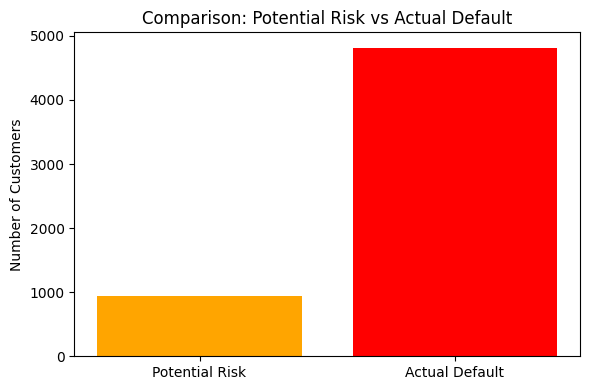

In [ ]:
import matplotlib.pyplot as plt

# Count of customers flagged as potential risk
potential_risk_count = final_risk_df['Potential_Risk'].sum()

# Count of customers who actually defaulted
actual_default_count = final_risk_df['Default_Date'].notna().sum()

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Potential Risk', 'Actual Default'], [potential_risk_count, actual_default_count], color=['orange', 'red'])
plt.title('Comparison: Potential Risk vs Actual Default')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()
